Gaussian frequency domain filter: $ W(f) = e^{\frac{-f^2}{2f_c^2}} $, where $f$ is frequency (in Hz) and $f_c$ is
the cutoff frequency.

For very _low_ frequencies, $W(f) \sim 1$, whereas for high frequencies, $W(f \rightarrow \infty) \rightarrow 0$

Although the filtering action is not “hard-wall”, mean-ing the cut-off is not abrupt, the parameter $f_c$ is a useful way to characterize the frequency response of this filter, so we shall treat it as the cut-off frequency of this filter.

Please write a program with calling signature `gauss_filter_freq(t, y, B)` which implements a frequency-domain filter of noisy input data.

The inputs are the time axis $t$, the input signal $y$, and the cut-off frequency $B=f_c$.

Implement the filter by Fourier transforming the input data $y$ (using Matlab’s `fft()`), multiplying by a Gaussian filter function `W(f)`, then inverse Fourier transforming the result.

Make sure you use `fftshift` and `ifftshift` to place the transformed data into the correct form for multiplication with the filter function `W(f)`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sqrt, exp
from scipy.ndimage import gaussian_filter1d

In [12]:
def gauss_filter_freq(t, y, B, title):
    # Frequency domain Gaussian
    W = lambda f: np.exp(-np.square(f) / (2 * pi**2 * B**2))

    dt = t[1] - t[0]
    N = t.shape[0]
    fs = 1/dt
    fmax = fs * (N - 1) / N
    f = np.linspace(0, fmax, N)

    fft = np.fft.fft(y)
    w = W(f)
    filtered = np.fft.fftshift(fft * w)
    plt.plot(f, np.fft.fftshift(fft.real), label='fft', alpha=.7)
    plt.plot(f, np.fft.fftshift(w), label='filter coeff', alpha=.7)
    plt.plot(f, filtered, label='filtered', alpha=.7)
    plt.legend()
    plt.title(f"Frequency - {title}")
    plt.show()
    
    ans = np.fft.ifft(np.fft.ifftshift(filtered)).real
    plt.plot(t, ans, label='denoised')
    plt.plot(t, gaussian_filter1d(y, B), label='scipy actual')
    plt.plot(t, y, alpha=.7, label='noisy')
    plt.legend()
    plt.title(f"Time - {title}")
    plt.show()
    return ans

/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


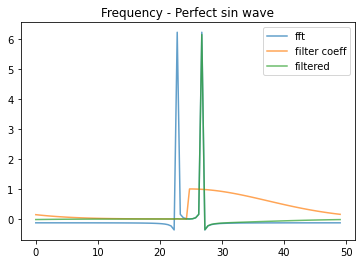

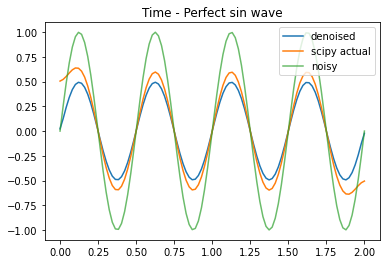

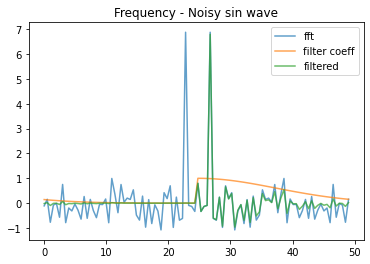

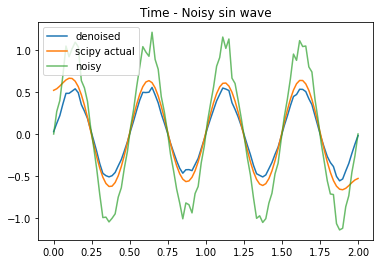

In [13]:
f = 2
w = 2. * np.pi * f
time_interval = 2
samples = 100
x_axis = np.linspace(0, time_interval, samples)

noisy_signal = np.sin(w * x_axis) * np.random.normal(1, .1, size=x_axis.shape[0])

# Cutoff frequency
f_c = 4

gauss_filter_freq(x_axis, np.sin(w * x_axis), f_c, title='Perfect sin wave')
gauss_filter_freq(x_axis, noisy_signal, f_c, title='Noisy sin wave')
plt.show()

/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/anirudhkamath/opt/anaconda3/envs/MATH7203/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


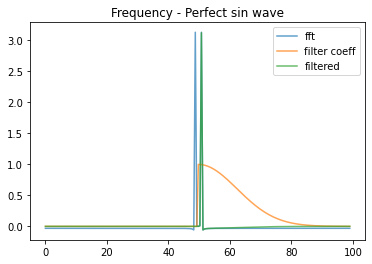

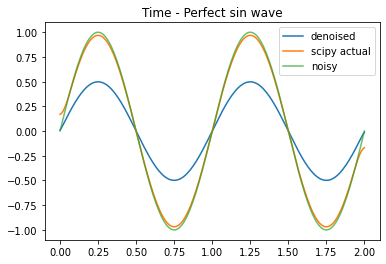

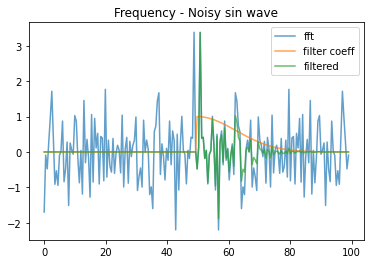

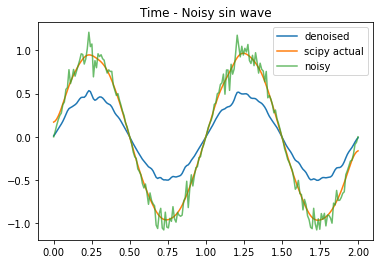

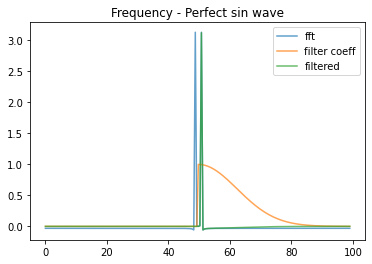

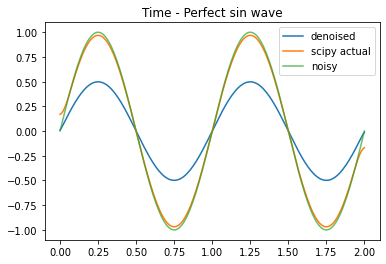

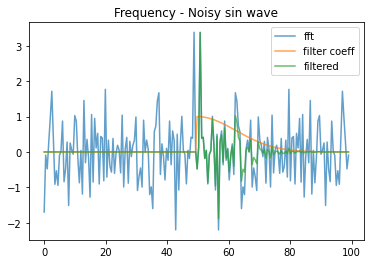

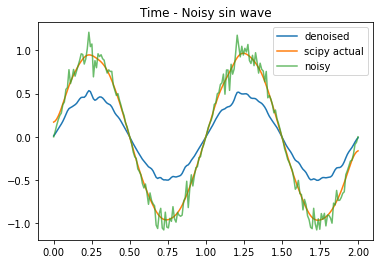

In [7]:
f = 5
w = 2. * np.pi * f
time_interval = 2
samples = 200
x_axis = np.linspace(0, time_interval, samples)

noisy_signal = np.sin(w * x_axis) * np.random.normal(1, .1, size=x_axis.shape[0])

# Cutoff frequency
f_c = 4

gauss_filter_freq(x_axis, np.sin(w * x_axis), f_c, title='Perfect sin wave')
gauss_filter_freq(x_axis, noisy_signal, f_c, title='Noisy sin wave')
plt.show()

gauss_filter_freq(x_axis, np.sin(w * x_axis), f_c, title='Perfect sin wave')
gauss_filter_freq(x_axis, noisy_signal, f_c, title='Noisy sin wave')
plt.show()